# Visualizing Earth's Radiation Budget using NOAA Satellite Data

Goal: To lean how to read, display, and interpret satellite data, such as the [Shortwave Radiation Budget](https://www.star.nesdis.noaa.gov/goesr/product_sw.php), using Python!

## A Very Short Summary of Earth's Radiation Budget

Chapter 4 of Wallace and Hobbs provide a more in-depth discussion of Earth's Radiation Budget, some salient discussion points are included below.

Earth's radiation budget is used to track the balance between incoming and outgoing energy. The sun provides the Earth with shortwave radiation (0.1-4.0μm) which can then be absorbed and remmited at longwave radiation (3.0–100μm) by there atmosphere or Earth's surface. If in balance, Earth's temperature remains relatively stable. If more radiation enters than exits, that can cause global warming.

Shortwave radiation can be detected from [surface observation stations](https://gml.noaa.gov/grad/surfrad/) and also from space using geostationary satellites. In this lesson, we will look at three different satellite retrieval datasets (also called products):

* Outgoing Longwave Radiation (OLR)
* Reflected Shortwave Radiation (RSR)
* Downward Shortwave Radiation (DSR)

From the annotated graphic below ([source](https://scied.ucar.edu/image/radiation-budget-diagram-earth-atmosphere)), there are many processes to account for beyond the DSR, RSR, and OLR, but not all are observed from space. 

<center><img src="images/radiation_budget.jpg" alt="TC" width="600"/></center>

The RSR product is the result of scattering and absorption of the incident solar radiation in the atmosphere and from the surface. RSR is reflected mostly by clouds (77 W/m<sup>2</sup>) or bright surfaces like sand and snow (22.9 W/m<sup>2</sup>). The OLR product is composed of all shortwave radiation that has been absorbed and remitted to thermal longwave and emitted from the top of the atmosphere out to space. Both the RSR and OLR are important for estimating Earth's radiation budget and modeling global warming. 

The DSR product is an estimate of the shortwave radiative flux per unit area that reaches the Earth's surface. Unlike RSR, bright surfaces do not impact the DSR because that radiation still reaches the surface. Shortwave-absorbing atmospheric constituents (e.g., ozone) and thick clouds prevent shortwave radiation from reaching the surface, thus decreasing the DSR. The DSR is important for monitoring the radiation budget at the surface and has applications in crop modeling and in the solar energy industry. 

## Detecting Radiation using Imagers on Geostationary Satellites

The shortwave radiation budget is estimated using a *satellite retrieval algorithm* that solves radiative transfer equations using measurements from imaging radiometers ([Fu and Liou, 1993](https://doi.org/10.1175/1520-0469(1992)049<2139:OTCDMF>2.0.CO;2)). The radiative transfer equations account scattering and absorption by gases, aerosols, and clouds ([Pinker and Laszlo, 1992](https://doi.org/10.1175/1520-0442(1992)005<0056:GDOPAR>2.0.CO;2)). The [GOES-R Series ABI instrument](https://www.goes-r.gov/spacesegment/abi.html) has 16 channels that are designed to detect radiation at different spectral wavelenths. The table below shows the 16 channels and which ones are used by the SRB product.

| Channel ID | Wavelength (µm) | Horizontal Resolution | Used in SRB |
| ---------- | --------------- |  -------------------- | ----------- |
| 1  | 0.470 | 1.0km | Yes |
| 2  | 0.640 | 0.5km | Yes |
| 3  | 0.865 | 1.0km | Yes |
| 4  | 1.378 | 2.0km | Yes |
| 5  | 1.610 | 1.0km | Yes |
| 6  | 2.250 | 2.0km | Yes |
| 7  | 3.900 | 2.0km | |
| 8  | 6.185 | 2.0km | |
| 9  | 6.950 | 2.0km | |
| 10 | 7.340 | 2.0km | |
| 11 | 8.500 | 2.0km | |
| 12 | 9.610 | 2.0km | |
| 13 | 10.35 | 2.0km | |
| 14 | 11.20 | 2.0km | |
| 15 | 12.30 | 2.0km | |
| 16 | 13.30 | 2.0km | |

The retrieval algorithm also incorporates other data products, aerosol optical depth, surface albedo, column totals of water vapor and ozone, and cloud peroperties such as depth, phase, and height.

## Detecting OLR from Low-Earth Orbit Satellites

OLR requires a dedicated sensor to measure it from space and which the GOES-R satellites do not have them. Howevever, OLR products can be costructed by combining measurements from infrared sounders onboard numerous polar orbiting satellites. In conjunction with [UMD](http://olr.umd.edu/), NOAA creates a [daily OLR product](https://www.ncei.noaa.gov/products/climate-data-records/outgoing-longwave-radiation-daily) that extends from 1979 to the present.

## Discovering Satellite Datasets

The the atmospheric sciences, satellite datasets are frequently stored in self-describing formats like [netcdf4](https://www.unidata.ucar.edu/software/netcdf/). NetCDF4 files contain multi-dimensional binary data and metadata that is organized in a standardized way and thus can be read using tools like Python libraries and software like [Panoply](https://www.giss.nasa.gov/tools/panoply/). In addition the observed values, information like the time of the overpass, data quality information, and the geolocation information. The schemative below conceptually shows the contents of a netCDF4 file, which can include 2D variables (temperature and precipitation) stored alongside their coordinates, latitude, longitude, and time. The binary storage and descriptive metadata strike a balance between compression and understanding, thus enabling easier dissemination and access of satellite datasets.

<center><img src="images/xarray.png" alt="TC" width="600"/></center>

There are thousands of satellite data products online. Generally, you can access satellite datasets by:
* Reading data directly from an online catalogs (e.g. [NOAA](https://www.star.nesdis.noaa.gov/portfolio/productListings.php) and [NASA](https://search.earthdata.nasa.gov/))
* Manually downloading browsing an AWS S3 bucket

Some ways to learn about new datasets include:
* Product websites (if one exists)
* Reading peer-reviewed publications

When examining a new dataset, there are some questions you should ask to become more familiar with its contents:

* How often is the data sampled? For example, every five minutes, half-hourly, hourly, daily?
* What is the spatial resolution of the dataset? This is often in degrees latitude/longitude or km.
* If the data are subdaily, are observations available during both day and night?

Satellite dataset names are quite long, but can be used to answer the first questions. For example:

**OR_ABI-L2-DSRF-M6_G16_s20222851800206_e20222851809514_c20222851827249.nc**

The prefix indicates the instrument (OR_ABI), product/region (DSRF, DSR data on the full-disk), scan mode (M6), and satellite source (G16 for GOES-16). 

The remainder of the name shows the start (s), end (e), and creation (c) time, which are each followed by the year, month, day, hour, minute, and seconds (to one decimal place). GOES dataset names use [day of year format](https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html) for dates. The file above contains data observed on day 285 in 2022 (which is Oct 11, 2022) beginning at 18:00:02 UTC and ended at 18:09:51 UTC; thus the data contains a ~10 minutes snapshot. The file was create at 18:27 UTC, so it took 20 minutes to run the retrieval and create the file. We'll browse the data source using Python, but based on the [data holdings on Amazon Webservices](https://noaa-goes16.s3.amazonaws.com/index.html#ABI-L2-RSRF/2022/285/18/), there is only one file for each hour, so this product is made once an hour.

We will have to read documentation on the dataset, or open the dataset directly to answer the other questions.

This lesson's examples will look Oct 11, 2022. Below is a "True Color" image of the Earth, as seen from GOES-16 around the time of our examples:

<center><img src="images/TC.jpg" alt="TC" width="300"/></center>

## Using Python to Access and Visualize Satellite Datasets

The workflow for accessing and visualizing datasets with Python broadly follows these steps:
1. Import relevant Python packages
2. Download or search remote repositories for the data we want
3. Import the dataset into memory
4. Wrangle data for visualization
5. Make a plot

We will import four packages in this section:

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

Numpy is useful for working with multidimensional data, Matplotlib creates visualizaitons and plots, and xarray can read and wrangle netcdf files.

## Visualizing Outgoing Longwave Radiation

Next we need to download data. I already did this step in this example; the file is stored in the same directory as the code, so we can access it directly with just the filename. We can open the file using the [xarray package](https://docs.xarray.dev/en/stable/user-guide/io.html). The opened dataset (the 'data array') can be imported to memory by assigning it to a variable (da).

Note: I edited the original file to save some time/assist with learning.

In [90]:
da = xr.open_dataset('olr-daily_v01r02_20221011.nc')
da

<xarray.Dataset>
Dimensions:      (lon: 360, bnds: 2, lat: 180)
Coordinates:
  * lon          (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat          (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    time         datetime64[ns] ...
Dimensions without coordinates: bnds
Data variables:
    lon_bounds   (lon, bnds) float32 ...
    olr          (lat, lon) float32 ...
    lat_bounds   (lat, bnds) float32 ...
    time_bounds  (bnds) datetime64[ns] ...
Attributes: (12/46)
    conventions:                CF-1.6
    title:                      Daily OLR CDR Product Ver01Rev02-preliminary
    source:                     NOAA Archive of HIRS L1B data from TIROS-N Se...
    reference:                  doi:10.1175/2007JTECHA989.1  doi:10.1175/1520...
    history:                    2022-11-20T17:02:21Z - generated by software ...
    comment:                    ICDR
    ...                         ...
    software_version_id:        Ver01Rev02
    Metadata_Link:              gov.noaa.ncdc:C00875
    product_version:            Ver01Rev02-preliminary
    platform:                   TIROS-N > Television Infrared Observation Sat...
    sensor:                     HIRS-2 > High Resolution Infra-red Sounder/2,...
    spatial_resolution:         1.0 by 1.0 degree equal angle

The assigned variable da is on the second line to print the file header. We can learn a lot about the file from the header. For example, the file dimensions are 180 x 360, there is a two-dimensional variable named olr that is probably what we are looking for. The latitude and longitude values are also present, which will be useful later.

The individual datasets are accessible using the following syntax:

In [91]:
da.olr

<xarray.DataArray 'olr' (lat: 180, lon: 360)>
[64800 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     datetime64[ns] ...
Attributes:
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    standard_name:  toa_outgoing_longwave_flux
    units:          W m-2
    cell_methods:   time: mean area: mean
    valid_min:      50.0
    valid_max:      500.0

Congratulations, you have successfully read the data into Python! Next, we can make a simple [mesh plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) using the matplotlib package to take a look at the OLR data. 

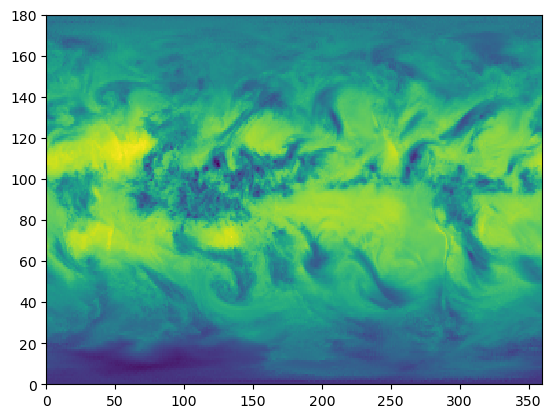

In [92]:
plt.figure()
ax = plt.subplot()
ax.pcolormesh(da.olr)
plt.show()

While the above image is colorful, it's nearly impossible to know where they are located. This is where "data wrangling" begins! In practice, data wrangling takes up a lot of a scientist's time when performing a study.

Since we didn't provide any x or y values, only the matrix indices are printed on the x and y axis. Let's extract the latitude and longitude information:

In [93]:
lat = da.lat
lon = da.lon

To plot this data, we need to make *sure all three variables have the same dimensions* which we can determine using the shape function (.shape).

In [94]:
lat.shape, lon.shape, da.olr.shape

((180,), (360,), (180, 360))

The variables lat and lon are 1D while RSR is 2D. We can use numpy's meshplot function to project 1D variables onto 2D. This functions returns two variables, which we will name x_olr and y_olr.

In [95]:
x_olr, y_olr = np.meshgrid(lon, lat)

Now, checking the shapes of each variable again, we can see they're all the same size:

In [96]:
x_olr.shape, y_olr.shape, da.olr.shape

((180, 360), (180, 360), (180, 360))

The code below is similar to the last plot example, but we are now passing three parameters into pcolormesh: the x-values (x_olr), y-values (y_olr), and z-values (da.olr). I am also adding x and y labels for clarity.

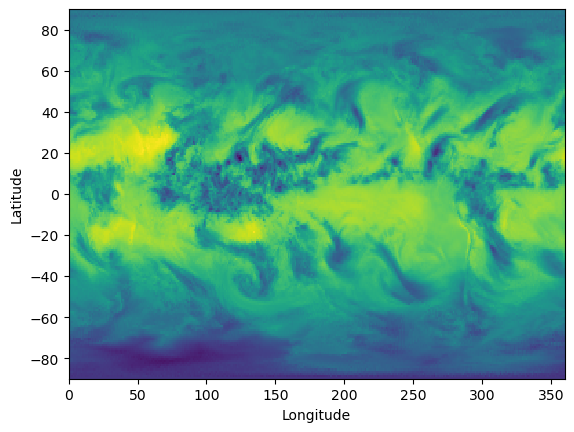

In [97]:
# This time, we're passing x and y variables to pcolormesh
plt.figure()
ax = plt.subplot()
ax.pcolormesh(x_olr, y_olr, da.olr)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

The plot looks the same, but now the x and y axes use the correct latitude and longitude coordinates. However, it's difficult to know exactly where we are without a map overlay on our plot.

### Adding maps to plots

The package Cartopy adds mapping functionality to Matplotlib. Cartopy provides
an interface to obtain continent, country, and feature details to overlay onto
your plot. Furthermore, Cartopy also enables you to convert your data from one
map projection to another. There are [many, many projections](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) availabe in cartopy. Today we'll explore two:

* Plate Carree: Plate Carrée (French for “flat square”) is a type of equirectangular projection. It is a common projection because it is intuitive to plot a pixel on these maps – the longitude and latitude coordinates are equal to the x and y geometric coordinates.
* Orthographic: Orthographic plots are conformal, usually centered at 0 N, 0 E, but can also be centered at the poles. This plot is advantageous because it looks spherical, and data look how we would intuitively expect them to if we were in space. This projection is useful for geostationary data, which continuously monitors one region of the Earth.

Let's import cartopy:

In [98]:
import cartopy.crs as ccrs

We need to define two projections: the projection that the data are on and the projection we want our plot to reflect. They can be the same projection and since our plot is global, we will make both the plot and data projection Plate Careee.

In [99]:
plot_projection = ccrs.PlateCarree()
data_projection = ccrs.PlateCarree()

To add the map to the plot, you can start with the code from the previous plotting example. However, we will pass the plot projection into subplots (what we want to convert the data to) and the data projection to transform into pcolormesh (what we want to convert the data from). Since we're going from plate carree to plate carree, no transformation is taking plate.

Finally, we need to add the ax.coastlines command to actually draw the map on top of the data. We can optionally add the x and y labels using ax.gridlines(draw_labels=True).

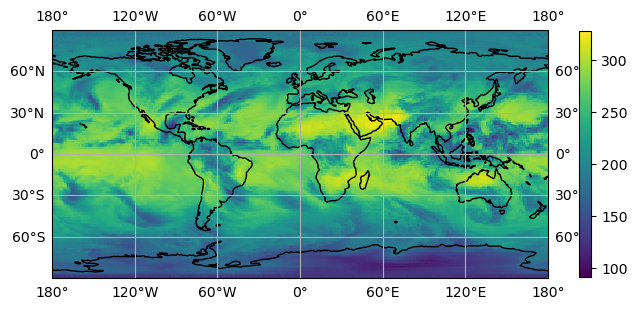

In [100]:
plt.figure(figsize=[8,8])
ax = plt.subplot(projection=plot_projection)
ax.coastlines()
ax.gridlines(draw_labels=True)

tmp = ax.pcolormesh(x_olr, y_olr, da.olr, transform=data_projection)
plt.colorbar(tmp, shrink=0.4)
plt.show()

## Importing Data from AWS

In the previous example, I provided a dataset for us to learn with. However, in practice, you'll have to discover and import your own datasets. There are thousands of satellite data products freely available to you to look at for fun and for research. Amazon supports an [open data program](https://aws.amazon.com/opendata/) that makes many climate datasets publicly available.

The package s3fs is file interface for Amazon S3 (Simple Storage Service) buckets, so you can browse and search for data. NOAA's Open Data Dissemination (NODD) program is increasing access to satellite data, including GOES and JPSS. In this tutiral, we'll look at [GOES-16 data](https://registry.opendata.aws/noaa-goes).

In [101]:
import s3fs


Moving on to step two, we need to import the data into memory. To do this, we have to initialize the filesystem. We pass in the keyword anon because we are not going to pass any login information since the data are public. If you ever need to access datasets that require a username and password, you'll have to pass that instead.

In [102]:
fs = s3fs.S3FileSystem(anon=True)

You can manually browse the [contents of the S3 bucket](https://noaa-goes16.s3.amazonaws.com/index.html) or you can search in the cell below. The S3 bucket is named 'noaa-goes16,' and using s3fs's ls command (we'll only print the first 5 entries for brevity):

In [103]:
fs.ls('noaa-goes16')[0:5]

['noaa-goes16/ABI-L1b-RadC',
 'noaa-goes16/ABI-L1b-RadF',
 'noaa-goes16/ABI-L1b-RadM',
 'noaa-goes16/ABI-L2-ACHAC',
 'noaa-goes16/ABI-L2-ACHAF']

This is a very slow and painful way to look for data, so it is helpful to have some idea of what you are looking for. **The RSR data product name is 'ABI-L2-RSRF'** ... you're welcome :-) 

We can repeat the search above by extending the argument from 'noaa-goes16' to 'noaa-goes16/ABI-L2-RSRF' and running the command again. As a reminder, GOES datasets store the date in [day of year format](https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html) not in month day. In our example, we're looking at Oct 11, 2022. The day of the year is 285 since 2022 is not a leap year. The hours are in [UTC](https://www.timeanddate.com/worldclock/timezone/utc), so make sure the hour you pick is during the local daytime.

To save some time typing, let's construct the full path below:

In [104]:
bucket_name = 'noaa-goes16'
product_name = 'ABI-L2-RSRF'
year = 2022
doy = 285
hour = 18

path = bucket_name + '/' + product_name + '/' + str(year) + '/' + str(doy).zfill(3) + '/' + str(hour).zfill(2) + '/'
print(path)

noaa-goes16/ABI-L2-RSRF/2022/285/18/


We can use the ls command (short for list) to view all the files in the bucket directory. Since the data are hourly, there is only one file in the bucket:

In [105]:
# Find the specific file
files = fs.ls(path)
print(files)

['noaa-goes16/ABI-L2-RSRF/2022/285/18/OR_ABI-L2-RSRF-M6_G16_s20222851800206_e20222851809514_c20222851901446.nc']


There is only one file above, but you'll notice the square brackets \[ \] which means it's in a list. We can check the variable type using the type command:

In [106]:
type(files)

list

We can extract a single file path from the list using the [0] index.

In [107]:
# Open
remote_obj = fs.open(files[0], mode='rb')

 Now that we have found our the remote path to our files in the satellite data "haystack" we can finally open them:
 
## Visualizing hourly Reflected Shortwave Radiation 

The next few steps are similar to the ones we followed in the OLR example. We will use xarray to read the netcdf file and print the header information:

In [108]:
# Read
abi_L2_RSR = xr.open_dataset(remote_obj, engine='h5netcdf')
abi_L2_RSR

<xarray.Dataset>
Dimensions:                                 (lat: 652, lon: 652,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2,
                                             number_of_wavelength_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * lat                                     (lat) float64 81.38 81.12 ... -81.38
  * lon                                     (lon) float64 -156.4 ... 6.375
    lat_image                               float32 ...
    lon_image                               float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    retrieval_solar_zenith_angle            float32 ...
    quantitative_solar_zenith_angle         float32 ...
    rsr_product_wavelength                  float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_wavelength_bounds
Data variables: (12/32)
    RSR                                     (lat, lon) float32 ...
    DQF                                     (lat, lon) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_lat_lon_projection                 int32 ...
    lat_image_bounds                        (number_of_image_bounds) float32 ...
    lon_image_bounds                        (number_of_image_bounds) float32 ...
    ...                                      ...
    std_dev_rsr                             float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2022-10-12T18:00:20.6Z
    time_coverage_end:         2022-10-12T18:09:51.4Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        2d77b14b-4b81-4917-90af-515c74437524

Like before, let's extract the latitude and longitide values and examine the shape.

In [109]:
lat_rsr = abi_L2_RSR.lat.values
lon_rsr = abi_L2_RSR.lon.values
lat_rsr.shape, lon_rsr.shape, abi_L2_RSR.RSR.shape

((652,), (652,), (652, 652))

Once again, you can see they're not the same dimensions and we'll have to use meshgrid:

In [110]:
x_rsr, y_rsr = np.meshgrid(lon_rsr, lat_rsr)

Now that we have our (x, y, z) values, we can create out plot. This time, let's exploring using another map project.


Since geostationary data will only cover once side of the planet, lets try using an orthographic projection this time. The default position of this map centers over the (0°N,0°W) point, but GOES-16 is centered over (0°N,75.2°W), so we will pass in an arguement to move the center. Note: The center point is actually stored in the netcdf file, in the variable nominal_satellite_subpoint_lon and nominal_satellite_subpoint_lat. You could access these with the command da.nominal_satellite_subpoint_lon and danominal_satellite_subpoint_lat. It's helpful to have this information in the file versus having to read documentation to find out!

In [111]:
plot_projection =ccrs.Orthographic(central_longitude=-75.2)
data_projection = ccrs.PlateCarree()

It would also be helpful to add a colorbar. I add the shrink argument to the colorbar because otherwise it takes up a lot of space on the plot (try removing it if you like!).

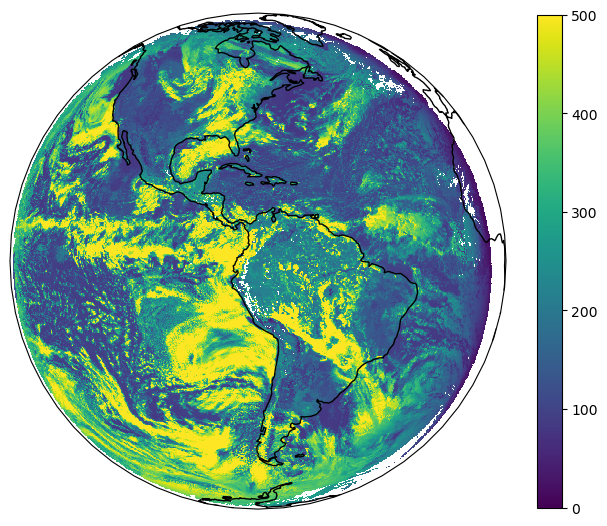

In [112]:

plt.figure(figsize=[8,8])
ax = plt.subplot(projection=plot_projection)
ax.coastlines()
ax.set_global()
tmp = ax.pcolormesh(x_rsr, y_rsr, abi_L2_RSR.RSR, transform=data_projection, vmin=0, vmax=500)
plt.colorbar(tmp, shrink=0.8)
plt.show()

In the plot above, you'll notice that clouds tend to be reflect more shortwave radiation than land surfaces. There is also variation across different land surfaces. 

The RSR data is useful but it's important to understand a datasets strengths and limitations. High altitudes in South America can lead to unsuccessful retrievals (and hence missing values, in white). Retrieval accuracy also deteriorates at large scan angles. TMost datasets have a *quality flag field* to help data users know where there is higher confidence in the retrieval. In the RSR dataset, this variable is called DQF which can be used to filter low-quality data from the plot. Below is some sample code to remove low-quality values.

In [113]:
mask =  abi_L2_RSR.DQF == 1
abi_L2_RSR.RSR.values[mask] = np.nan

If you rerun the plotting code again, it will use the updated values. 

## Summary
In this lesson we learned how to access several radiation budget datasets, import them into python, and display on a plot. While there are some differences in how we handled these datasets, the workflow for accessing and visualizing datasets is similar:

1. Import relevant Python packages
2. Download or search remote repositories for the data we want
3. Import the dataset into memory
4. Wrangle data for visualization
5. Make a plot

Next steps: Test your knowledge by completing the assignment!